# Rotation detection using Machine Learning and the databot2.0

## Imports

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Gather / Collect Data

## Execute rotational_data_collector.py script

We will need to collect rotational data for the follow targets:

* stationary
* pendulum
* vertical
* horizontal

## Explore and Visualize Data

In [34]:
df_steady = pd.read_json("./data/steady.txt", lines=True)
df_pendulum = pd.read_json("./data/pendulum.txt", lines=True)
df_horizontal = pd.read_json("./data/horizontal.txt", lines=True)
df_vertical = pd.read_json("./data/vertical.txt", lines=True)


In [35]:
df_steady.shape

(1000, 10)

In [36]:
df_pendulum.shape

(1000, 10)

In [37]:
df_horizontal.shape

(1000, 10)

In [38]:
df_vertical.shape

(1000, 10)

In [39]:
# Merge all of the separate dataframes into a single dataframe
df = pd.concat([df_steady, df_pendulum, df_horizontal, df_vertical])


In [40]:
df.shape

(4000, 10)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   time                          4000 non-null   float64       
 1   gyro_x                        4000 non-null   float64       
 2   gyro_y                        4000 non-null   float64       
 3   gyro_z                        4000 non-null   float64       
 4   linear_acceleration_x         4000 non-null   float64       
 5   linear_acceleration_y         4000 non-null   float64       
 6   linear_acceleration_z         4000 non-null   float64       
 7   absolute_linear_acceleration  4000 non-null   float64       
 8   timestamp                     4000 non-null   datetime64[ns]
 9   rotation                      4000 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 343.8 KB


As we would expect, there are no missing values and no Strings.  Each column is made up of numbers

In [42]:
df.head()

,time,gyro_x,gyro_y,gyro_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,timestamp,rotation
0,0.2,-8.18,0.49,1.04,0.15,-0.37,-0.26,0.47,2023-09-08 18:39:30.219958016,0
1,0.4,-8.06,0.43,0.98,0.16,-0.39,-0.25,0.49,2023-09-08 18:39:30.423803904,0
2,0.6,-8.06,0.37,1.04,0.14,-0.39,-0.27,0.49,2023-09-08 18:39:30.615062016,0
3,0.8,-7.75,0.24,1.04,0.15,-0.39,-0.29,0.51,2023-09-08 18:39:30.830430976,0
4,1.0,-7.81,0.43,1.28,0.10,-0.40,-0.23,0.47,2023-09-08 18:39:31.008023040,0


In [43]:
df.tail()

,time,gyro_x,gyro_y,gyro_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,timestamp,rotation
995,199.33,-1080.63,-371.34,111.39,75.57,-89.37,-41.51,124.18,2023-09-08 21:07:52.045163008,2
996,199.53,-182.43,1194.52,-502.44,38.55,-52.31,-22.79,68.86,2023-09-08 21:07:52.247817984,2
997,199.73,-1375.31,-258.30,-266.42,85.27,-99.57,-38.82,136.72,2023-09-08 21:07:52.461683968,2
998,199.93,-430.79,1288.02,450.56,43.49,-55.55,-18.64,72.97,2023-09-08 21:07:52.652011008,2
999,200.13,-1086.55,-298.95,-742.19,74.92,-91.45,-32.33,122.56,2023-09-08 21:07:52.855406080,2


### Visualizations

In [44]:
# Add a name column to make labeling easier
df['rotation_name'] = df['rotation'].map({0:'steady', 1:'pendulum', 2:'horizontal', 3:'vertical'})

### Visualize the Acceleration X data


/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='linear_acceleration_x'>

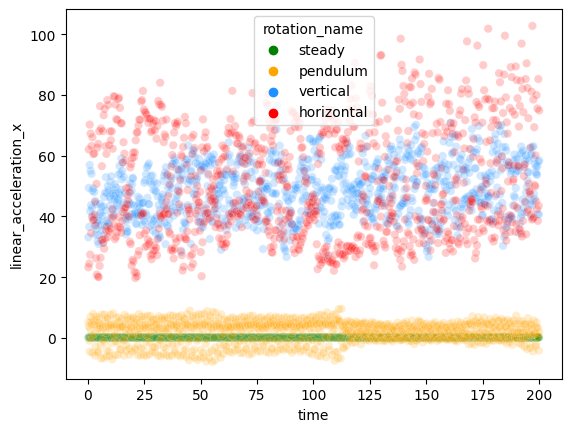

In [45]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_x', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )


### Visualize the Acceleration Y data


/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='linear_acceleration_y'>

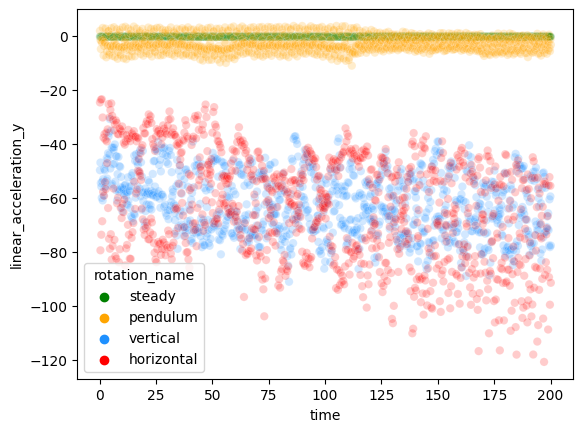

In [46]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_y', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

### Visualize the Acceleration Z data


/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='linear_acceleration_z'>

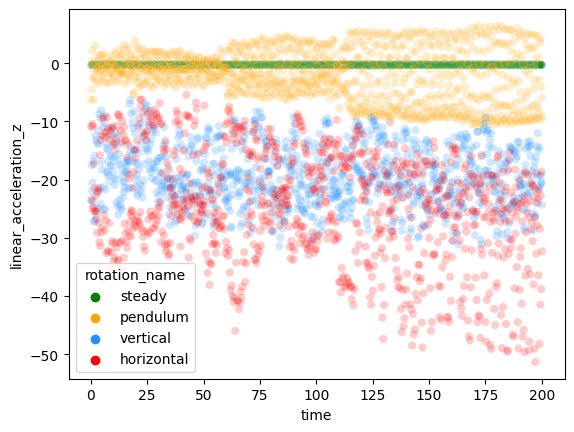

In [47]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_z', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

### Visualize the Gyroscope X data

/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='gyro_x'>

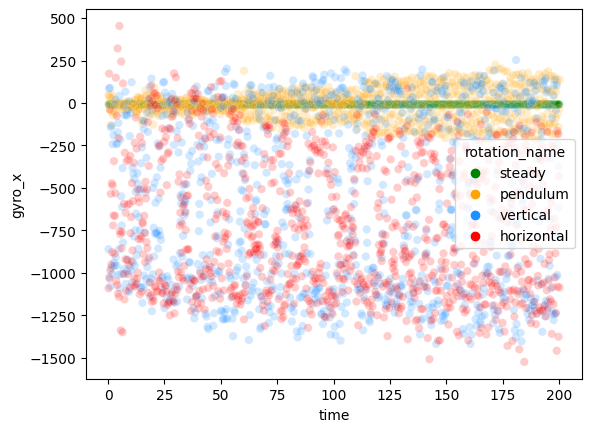

In [48]:
sns.scatterplot(data=df, x='time', y='gyro_x', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

### Visualize the Gyroscope Y data

/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='gyro_y'>

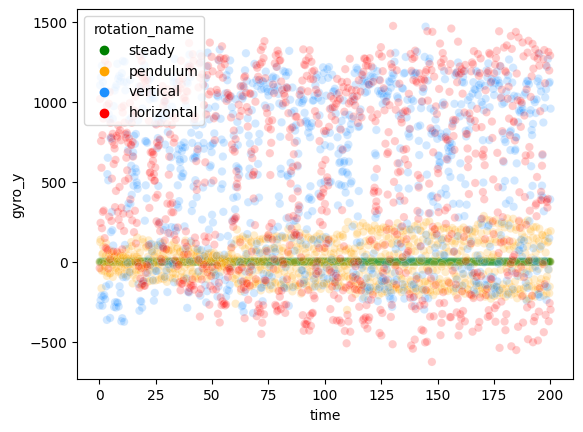

In [49]:
sns.scatterplot(data=df, x='time', y='gyro_y', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

### Visualize the Gyroscope Z data

/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='gyro_z'>

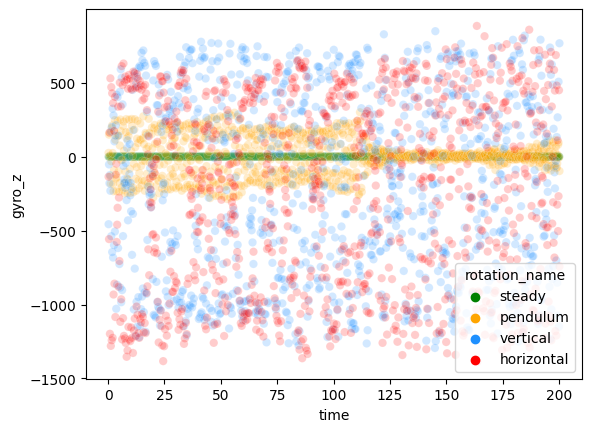

In [50]:
sns.scatterplot(data=df, x='time', y='gyro_z', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

### Absolute Linear Acceleration

/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/github/droneblocks/Databot-Machine-Learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickryan/Development/git

<Axes: xlabel='time', ylabel='absolute_linear_acceleration'>

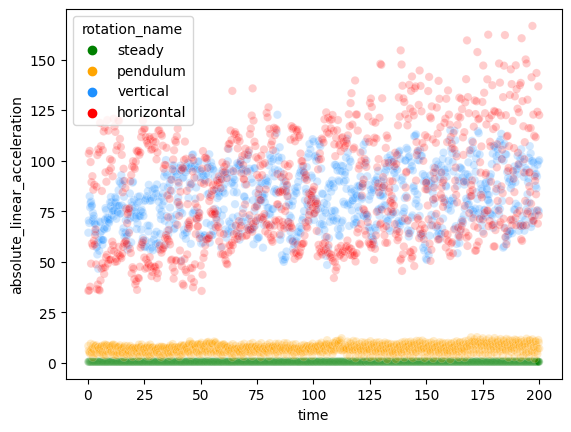

In [51]:
sns.scatterplot(data=df, x='time', y='absolute_linear_acceleration', hue='rotation_name', alpha=0.2, palette=['green', 'orange', 'dodgerblue', 'red'] )

## Prepare Data

Some machine learning models will need us to scale the values to the same range.  

RandomForestClassifier does not have that restriction

Because we have no missing data values and all of the values are numeric, there really is no significant data preparation that needs to be done.

Keep in mind... if we had picked a model other an a Tree based model, then we would have to scale the input values

In [52]:
y = df['rotation']
X = df.drop(columns=['rotation', 'time', 'timestamp', 'rotation_name'])

In [53]:
X.shape

(4000, 7)

In [54]:
y.shape

(4000,)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

## Train a Machine Learning Model

In [57]:
model = RandomForestClassifier()

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_train = model.predict(X_train)


In [60]:
accuracy_score(y_train, y_pred_train)


1.0

## Test Machine Learning Model

In [61]:
y_pred_test = model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_test)

0.9775

### What were the most important features to the RandomForestClassifier model

In [63]:
importance_list = []

for tup in zip(X_train.columns, model.feature_importances_):
    
    importance_list.append(tup) 
sorted_importance_list = sorted(importance_list, key=lambda tup: tup[1], reverse = True)
sorted_importance_list[0:10]

[('absolute_linear_acceleration', 0.2848054914451445),
 ('linear_acceleration_y', 0.18544050809170967),
 ('linear_acceleration_x', 0.18128109521432792),
 ('linear_acceleration_z', 0.15604004774677982),
 ('gyro_x', 0.07309167771593145),
 ('gyro_y', 0.0607692041095297),
 ('gyro_z', 0.05857197567657705)]

## Make Predictions on new data

Before we make predictions on new data, we would like to re-train the model on all of the collected data.

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(X,y)

RandomForestClassifier()

In [66]:
# Save the model so we can use it to autonmously drive the car
import joblib

joblib.dump(model, "./rotation_detector_model.sav")


['./rotation_detector_model.sav']

Let's go write a new script to read new data from the databot and use the model to make new predictions.